# Test CMB lensing covariance 

We first test to run the default TJPCov parameter file, with the DES configuration. We then test with our custom parameter file. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sacc
from sacc import data_types
import numpy as np
import os
import tjpcov
from tjpcov.covariance_calculator import CovarianceCalculator
import healpy as hp
import pymaster as nmt
from matplotlib import pyplot as plt

In [3]:
notebook_dir = os.getcwd()

In [4]:
tjpcov_dir = os.path.dirname(os.path.dirname(tjpcov.__file__))

In [5]:
fn_ccl_sacc = os.path.join(tjpcov_dir, 'tests/benchmarks/32_DES_tjpcov_bm/cls_cov_as_txpipe.fits')
s = sacc.Sacc.load_fits(fn_ccl_sacc)

dts = s.get_data_types()

# for dt in dts:
#     print(dt)
#     tracer_sets = s.get_tracer_combinations(dt)
#     print(tracer_sets)

    
for n, t in s.tracers.items():
    print(t.name, t.quantity, type(t))
    
# Type of power spectra
data_types = np.unique([d.data_type for d in s.data])
print("Data types: ", data_types)

# Tracer combinations
print("Tracer combinations: ", s.get_tracer_combinations())

# Data size
print("Size: ", s.mean.size)

DESgc__0 galaxy_density <class 'sacc.tracers.NZTracer'>
DESwl__0 galaxy_shear <class 'sacc.tracers.NZTracer'>
DESwl__1 galaxy_shear <class 'sacc.tracers.NZTracer'>
Data types:  ['cl_00' 'cl_0b' 'cl_0e' 'cl_bb' 'cl_be' 'cl_eb' 'cl_ee']
Tracer combinations:  [('DESgc__0', 'DESgc__0'), ('DESgc__0', 'DESwl__0'), ('DESgc__0', 'DESwl__1'), ('DESwl__0', 'DESwl__0'), ('DESwl__0', 'DESwl__1'), ('DESwl__1', 'DESwl__1')]
Size:  240


In [6]:
# config_yml = 'tests/data/conf_covariance_calculator.yml'
config_yml = os.path.join(tjpcov_dir, 'tests/data/conf_covariance_calculator.yml')
# config_yml = os.path.join(tjpcov_dir, 'tests/data/conf_covariance_gaussian_fourier_nmt.yaml')
cc = CovarianceCalculator(config_yml)


In [7]:
# The TJPCOV default DES covariance needs to be computed 
# inside the TJPCov directory as it uses sometimes relative paths

%cd {tjpcov_dir}

/Users/louis/Code/TJPCov


In [8]:
cov = cc.get_covariance()

Computing independent covariance blocks
Computing the blocks for independent workspaces
('DESgc__0', 'DESgc__0') ('DESgc__0', 'DESgc__0')
Loading saved covariance tests/tmp/cov_DESgc__0_DESgc__0_DESgc__0_DESgc__0.npz
('DESgc__0', 'DESwl__0') ('DESgc__0', 'DESwl__0')
Loading saved covariance tests/tmp/cov_DESgc__0_DESwl__0_DESgc__0_DESwl__0.npz
('DESgc__0', 'DESwl__1') ('DESgc__0', 'DESwl__1')
Loading saved covariance tests/tmp/cov_DESgc__0_DESwl__1_DESgc__0_DESwl__1.npz
('DESwl__0', 'DESwl__0') ('DESwl__0', 'DESwl__0')
Loading saved covariance tests/tmp/cov_DESwl__0_DESwl__0_DESwl__0_DESwl__0.npz
('DESwl__0', 'DESwl__1') ('DESwl__0', 'DESwl__1')
Loading saved covariance tests/tmp/cov_DESwl__0_DESwl__1_DESwl__0_DESwl__1.npz
('DESwl__1', 'DESwl__1') ('DESwl__1', 'DESwl__1')
Loading saved covariance tests/tmp/cov_DESwl__1_DESwl__1_DESwl__1_DESwl__1.npz
Computing the blocks for independent covariance workspaces
('DESgc__0', 'DESgc__0') ('DESgc__0', 'DESwl__0')
Loading saved covariance test

/opt/miniconda3/envs/tjpcov0p4/lib/python3.11/site-packages/sacc/sacc.py:378: UserWarning: Empty index selected - maybe you should check the tracer order?
  warnings.warn("Empty index selected - maybe you "


('DESgc__0', 'DESwl__1') ('DESwl__1', 'DESwl__1')
Loading saved covariance tests/tmp/cov_DESgc__0_DESwl__1_DESwl__1_DESwl__1.npz
('DESwl__0', 'DESwl__0') ('DESwl__0', 'DESwl__1')
Loading saved covariance tests/tmp/cov_DESwl__0_DESwl__0_DESwl__0_DESwl__1.npz
('DESwl__0', 'DESwl__0') ('DESwl__1', 'DESwl__1')
Loading saved covariance tests/tmp/cov_DESwl__0_DESwl__0_DESwl__1_DESwl__1.npz
('DESwl__0', 'DESwl__1') ('DESwl__1', 'DESwl__1')
Loading saved covariance tests/tmp/cov_DESwl__0_DESwl__1_DESwl__1_DESwl__1.npz
Computing the remaining blocks
Building the covariance: placing blocks in their place
('DESgc__0', 'DESgc__0') ('DESgc__0', 'DESgc__0')
('DESgc__0', 'DESwl__0') ('DESgc__0', 'DESwl__0')
('DESgc__0', 'DESwl__1') ('DESgc__0', 'DESwl__1')
('DESwl__0', 'DESwl__0') ('DESwl__0', 'DESwl__0')
('DESwl__0', 'DESwl__1') ('DESwl__0', 'DESwl__1')
('DESwl__1', 'DESwl__1') ('DESwl__1', 'DESwl__1')
('DESgc__0', 'DESgc__0') ('DESgc__0', 'DESwl__0')
('DESgc__0', 'DESgc__0') ('DESgc__0', 'DESwl__1'

/var/folders/k2/pz579q490y94_cj44cpv_5l80000gn/T/ipykernel_15668/609981110.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(np.abs(cov)))


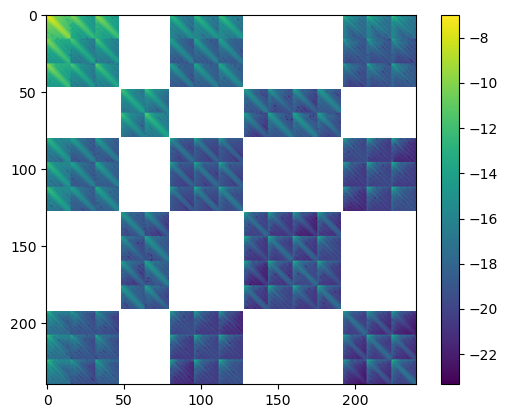

In [9]:
plt.imshow(np.log10(np.abs(cov)))
plt.colorbar()
plt.show()

## Now we use our custom parameter file

This parameter file is defined in 'conf_covariance_test.yml'. It includes the CMB lensing, galaxy weak lensing and galaxy clustering, each with one redshift bin. 

We tests for now the Gaussian case, with a sky fraction rescaling, so we do not take into account the masks. 

In [10]:
# We go back to the notebook directory to make our tests
%cd {notebook_dir}

/Users/louis/Code/cmblenscov/notebooks


In [11]:
# Sacc file generated from the CMB_LSS_write notebook 

fn_sacc = 'cmblss.fits'
s = sacc.Sacc.load_fits(fn_sacc)
dts = s.get_data_types()
# for dt in dts:
#     print(dt)
#     tracer_sets = s.get_tracer_combinations(dt)
#     print(tracer_sets)

    
for n, t in s.tracers.items():
    print(t.name, t.quantity, type(t))
    
    
# Type of power spectra
data_types = np.unique([d.data_type for d in s.data])
print("Data types: ", data_types)

# Tracer combinations
print("Tracer combinations: ", s.get_tracer_combinations())

# Data size
print("Size: ", s.mean.size)

ck cmb_convergence <class 'sacc.tracers.MapTracer'>
gc galaxy_density <class 'sacc.tracers.NZTracer'>
wl galaxy_shear <class 'sacc.tracers.NZTracer'>
Data types:  ['cl_00' 'cl_0b' 'cl_0e' 'cl_bb' 'cl_eb' 'cl_ee']
Tracer combinations:  [('ck', 'ck'), ('gc', 'ck'), ('gc', 'gc'), ('gc', 'wl'), ('wl', 'ck'), ('wl', 'wl')]
Size:  1000


In [12]:
dtype = s.get_data_types()[0]
tracers = s.get_tracer_combinations(data_type=dtype)[0]
ix = s.indices(data_type=dtype, tracers=tracers)

In [13]:
ix

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [14]:
s.get_bandpower_windows(ix).weight.shape

(3001, 100)

In [15]:
dtype = s.get_data_types()[0]
tracers = s.get_tracer_combinations(data_type=dtype)[0]
ix = s.indices(data_type=dtype, tracers=tracers)
bpw = s.get_bandpower_windows(ix)


In [16]:
bpw.weight

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype='>f8')

In [17]:
# dtype = s.get_data_types()[0]
# tracers = s.get_tracer_combinations(data_type=dtype)[0]
# ix = s.indices(data_type=dtype, tracers=tracers)
# bpw = s.get_bandpower_windows(ix)
# bpws = np.zeros_like(bpw.values) - 1. 
# for i, w in enumerate(bpw.weight.T):
#     bpws += (w>0)*(i+1)

# weights = np.sum(bpw.weight, axis=1)
# nmtBin = nmt.NmtBin(bpws=bpws, ells=bpw.values, weights=weights)

In [18]:
fnmask = ['/Users/louis/Code/TJPCov/tests/benchmarks/32_DES_tjpcov_bm/catalogs/mask_DESgc__0.fits.gz', 
          '/Users/louis/Code/TJPCov/tests/benchmarks/32_DES_tjpcov_bm/catalogs/DESwlMETACAL_mask_zbin0_ns32.fits.gz', 
          '/Users/louis/Code/TJPCov/tests/benchmarks/32_DES_tjpcov_bm/catalogs/DESwlMETACAL_mask_zbin1_ns32.fits.gz']
for f in fnmask:
    mask = hp.read_map(f)
    print(hp.get_nside(mask))

32
32
32


In [19]:
# config_yml = os.path.join(notebook_dir, 'conf_covariance_test.yml')
config_yml = os.path.join(notebook_dir, 'conf_covariance_test_namaster.yml')

cc = CovarianceCalculator(config_yml)

In [21]:
cov = cc.get_covariance()#use_coupled_noise=False)

Computing independent covariance blocks
Computing the blocks for independent workspaces
('ck', 'ck') ('ck', 'ck')
Loading saved covariance tmp/cov_ck_ck_ck_ck.npz
('gc', 'ck') ('gc', 'ck')
Loading saved covariance tmp/cov_gc_ck_gc_ck.npz
('gc', 'gc') ('gc', 'gc')
Loading saved covariance tmp/cov_gc_gc_gc_gc.npz
('gc', 'wl') ('gc', 'wl')
Loading saved covariance tmp/cov_gc_wl_gc_wl.npz
('wl', 'ck') ('wl', 'ck')
Loading saved covariance tmp/cov_wl_ck_wl_ck.npz
('wl', 'wl') ('wl', 'wl')
Loading saved covariance tmp/cov_wl_wl_wl_wl.npz
Computing the blocks for independent covariance workspaces
('ck', 'ck') ('gc', 'ck')
Loading saved covariance tmp/cov_ck_ck_gc_ck.npz
('ck', 'ck') ('gc', 'gc')
Loading saved covariance tmp/cov_ck_ck_gc_gc.npz
('ck', 'ck') ('gc', 'wl')
Loading saved covariance tmp/cov_ck_ck_gc_wl.npz
('ck', 'ck') ('wl', 'ck')
Loading saved covariance tmp/cov_ck_ck_wl_ck.npz
('ck', 'ck') ('wl', 'wl')
Loading saved covariance tmp/cov_ck_ck_wl_wl.npz
('gc', 'ck') ('gc', 'gc')
Lo

/Users/louis/Code/TJPCov/tjpcov/covariance_builder.py:887: UserWarning: Missing n_ell_coupled info for some tracers in the sacc file. You will have to pass it withthe cache
  warnings.warn(


In [22]:
cov = cc.get_covariance()


In [23]:
def cov2corr(cov):
    s = np.sqrt(cov.diagonal())
    return cov/np.outer(s,s)

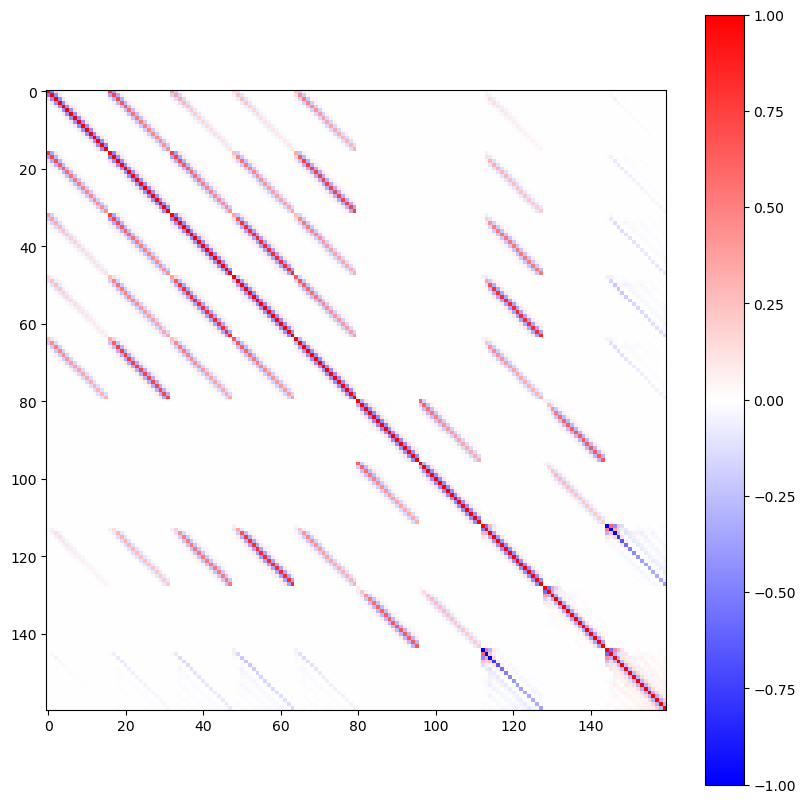

In [27]:
plt.figure(figsize=(10, 10))
plt.imshow(cov2corr(cov), vmin=-1, vmax=1, cmap='bwr')
plt.colorbar()
plt.savefig('cov_des_cmbk.pdf', bbox_inches='tight')